In [88]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import xarray as xr
import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

Read the different file types: pb-tags indicate pressure level files, pc-tags indicate pure surface files.
Past is 1980 vegetation, current is 2010. 
Topography and vegetation information is saved in ancillaries folder 'ancils'.

In [89]:
VERA_data_dir = '/home/ck/DIR/cornkle/data/vera_out/'

pl_files_current = glob.glob(VERA_data_dir+'current*pb*.nc')
pl_files_past = glob.glob(VERA_data_dir+'past*pb*.nc')
surface_files_current = glob.glob(VERA_data_dir+'current*pc*.nc')
surface_files_past = glob.glob(VERA_data_dir+'past*pc*.nc')
ancil_path = VERA_data_dir + 'ancils/'

In [90]:
study_box = [-10,10, 3,10]

In [96]:
test_file = xr.open_dataset(surface_files_current[0])

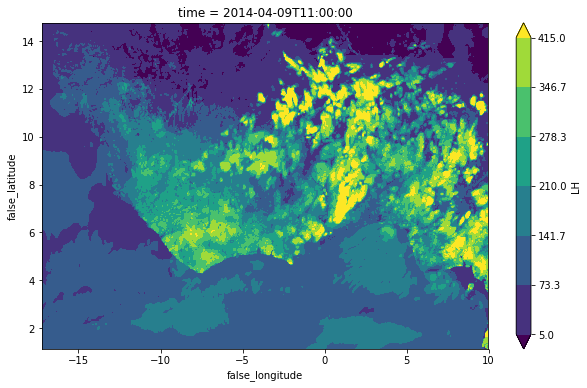

In [161]:
## quick and dirty data check, vmin=5 is set to not show negative values. As you can see, wrong coordinates are used
## Don't use this way of plotting for proper creation of plots - the image is distorted!
## This is a equi-distant cartesian coordinate system - in lat/lon coordinates (on a sphere) it 
## is therefore narrower in the South than in the North.. 
## Think for a second about why a regular lat/lon grid might be a problem for calculations (aggregations etc) and 
## the "truth of distance". 
plt.figure(figsize=(10,6))
test_file['LH'][10,:,:].plot.contourf(vmin=5, vmax=415)

In [162]:
test_file

<xarray.Dataset>
Dimensions:                     (false_latitude: 380, false_longitude: 750, time: 12)
Coordinates:
  * time                        (time) datetime64[ns] 2014-04-09T01:00:00 ... 2014-04-09T12:00:00
  * false_latitude              (false_latitude) float64 1.132 1.168 ... 14.77
  * false_longitude             (false_longitude) float64 -17.23 -17.2 ... 9.979
    true_latitude               (false_latitude, false_longitude) float64 0.9178 ... 14.64
    true_longitude              (false_latitude, false_longitude) float64 -16.95 ... 10.23
Data variables:
    sw_net                      (time, false_latitude, false_longitude) float32 ...
    sw_in                       (time, false_latitude, false_longitude) float32 ...
    lw_net                      (time, false_latitude, false_longitude) float32 ...
    lw_in                       (time, false_latitude, false_longitude) float32 ...
    SH                          (time, false_latitude, false_longitude) float32 ...
    LH  

In [98]:
### this is a dirty way of creating regular lat/lons without data interpolation
test_file.false_latitude.values = test_file.true_latitude.mean(axis=1)
test_file.false_longitude.values = test_file.true_longitude.mean(axis=0)

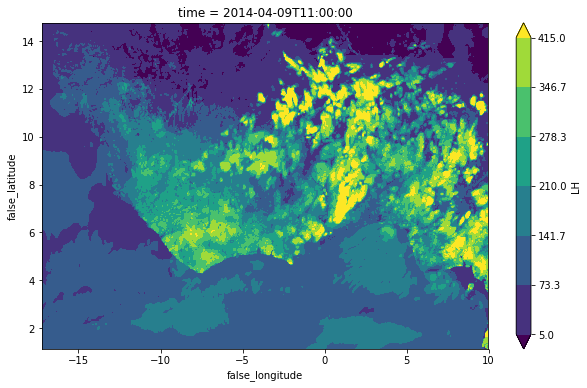

In [148]:
# the result below - still dirty way of plotting with xarray. Normally, don't use xarray plotting for clean plots!
plt.figure(figsize=(10,6))
test_file['LH'][10,:,:].plot.contourf(vmin=5, vmax=415)

In [164]:
## a better, cleaner way (where you have more control) - use matplotlib functions directly

def draw_map(data, lon, lat, title=None):
    f=plt.figure(figsize=(15,7))  # this opens a plot window
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())  # this opens a new plot axis
    plt.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels=np.linspace(5,415,8), extend='both')  # this is the actual plot
    ax.coastlines()   ## adds coastlines
    # Gridlines
    xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
    xl.xlabels_top = False   ## labels off
    xl.ylabels_right = False
    plt.title(title)
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
    plt.colorbar()  # adds colorbar
    plt.show()


## notice that I used the "true latitude", "true longitude" variables as dimensions! 
## also notice the white regions in this plot, this happens due to the respresentation on lat/lons.

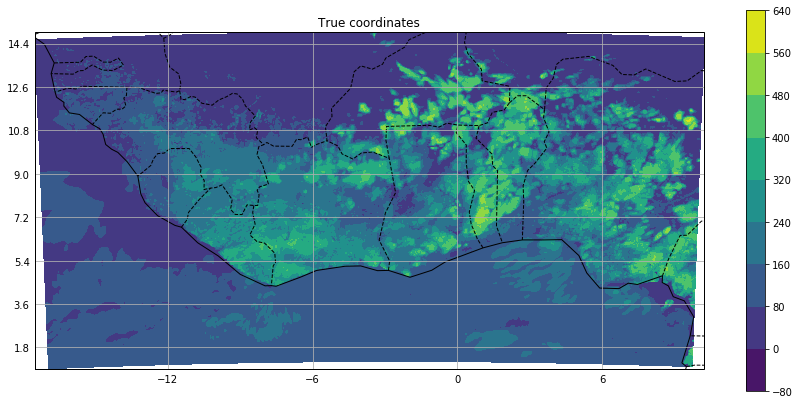

In [165]:
draw_map(test_file['LH'][10,:,:], test_file.true_longitude, test_file.true_latitude, title='True coordinates')

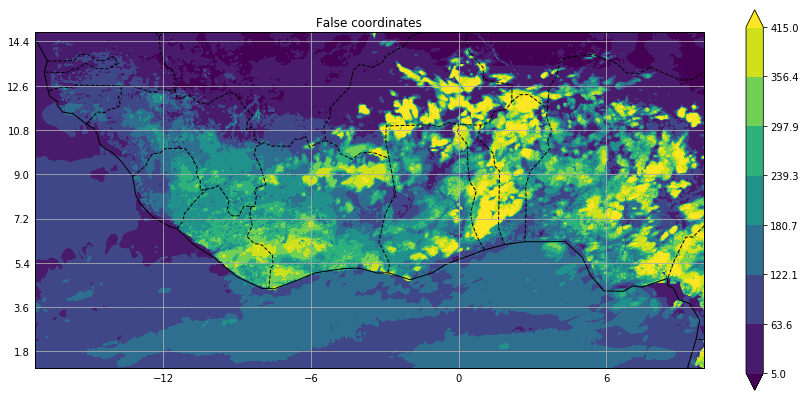

In [141]:
draw_map(test_file['LH'][10,:,:], test_file.false_longitude, test_file.false_latitude, title='False coordinates')

In [130]:
## Apply the mask to your data: this sets NaNs outside your box mask
flats = time_space_box.true_latitude.values
flons = time_space_box.true_longitude.values
mask = (flats>=study_box[0]) & (flats<=study_box[1]) & (flons>=study_box[2]) & (flons<=study_box[3])

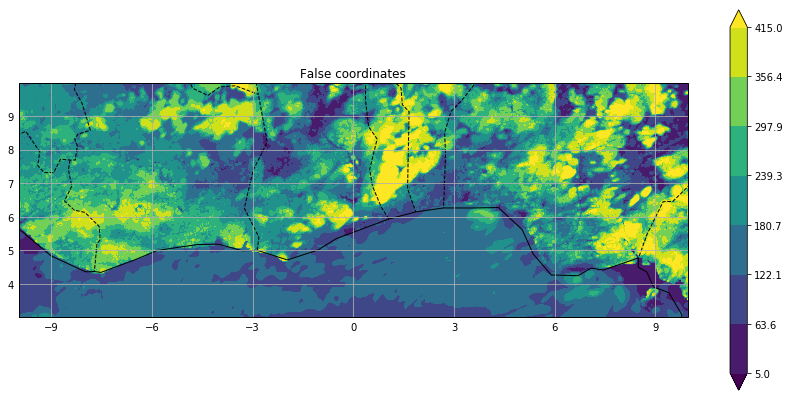

In [149]:
#Regular-coords domain cutting  - it only works with regular grids but only uses approximate grid
# You can use this for box cutting and map plotting - but don't use it for data selection when averaging!
LH_approx_cut = test_file['LH'].sel(false_longitude=slice(study_box[0], study_box[1]),false_latitude=slice(study_box[2],study_box[3]) )
draw_map(LH_approx_cut[10,:,:], LH_approx_cut.false_longitude, LH_approx_cut.false_latitude, title='False coordinates')

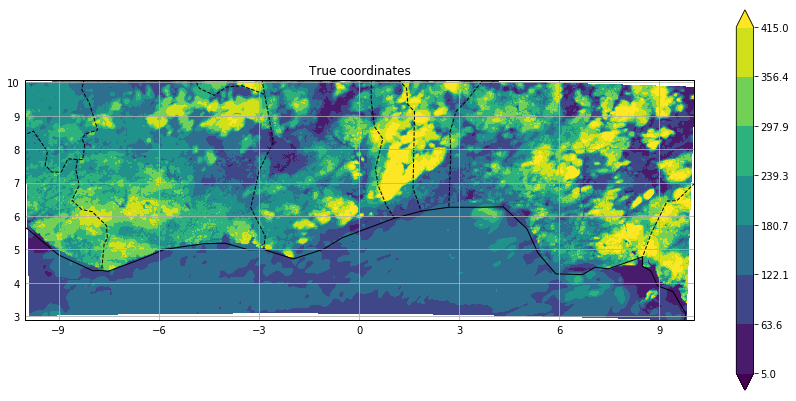

In [146]:
draw_map(LH_approx_cut[10,:,:], LH_approx_cut.true_longitude, LH_approx_cut.true_latitude, title='True coordinates')

In [155]:
lat_example = LH_approx_cut.sel(false_latitude=3.00, method='nearest')

In [159]:
lat_example.true_latitude.values

array([3.01361893, 3.01437862, 3.01513463, 3.01588696, 3.01663561,
       3.01738057, 3.01812184, 3.01885943, 3.01959333, 3.02032355,
       3.02105008, 3.02177292, 3.02249208, 3.02320755, 3.02391933,
       3.02462743, 3.02533183, 3.02603255, 3.02672958, 3.02742292,
       3.02811257, 3.02879853, 3.0294808 , 3.03015939, 3.03083428,
       3.03150548, 3.03217299, 3.03283681, 3.03349694, 3.03415337,
       3.03480611, 3.03545517, 3.03610053, 3.03674219, 3.03738017,
       3.03801445, 3.03864503, 3.03927193, 3.03989512, 3.04051463,
       3.04113044, 3.04174255, 3.04235097, 3.0429557 , 3.04355673,
       3.04415406, 3.0447477 , 3.04533764, 3.04592389, 3.04650644,
       3.04708529, 3.04766044, 3.0482319 , 3.04879966, 3.04936372,
       3.04992408, 3.05048075, 3.05103372, 3.05158298, 3.05212855,
       3.05267042, 3.05320859, 3.05374306, 3.05427383, 3.0548009 ,
       3.05532427, 3.05584394, 3.05635991, 3.05687218, 3.05738075,
       3.05788561, 3.05838677, 3.05888424, 3.059378  , 3.05986

In [160]:
lat_example.true_latitude.values.max()-lat_example.true_latitude.values.min()  # ~ difference is about 25km!

0.2182504530962852

In [163]:
import iris
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


# load some sample iris data
fname = surface_files_current[10]
temperature = iris.load_cube(fname)

# iris comes complete with a method to put bounds on a simple point
# coordinate. This is very useful...
temperature.coord('false_latitude').guess_bounds()
temperature.coord('false_longitude').guess_bounds()

# turn the iris Cube data structure into numpy arrays
gridlons = temperature.coord('false_longitude').contiguous_bounds()
gridlats = temperature.coord('false_latitude').contiguous_bounds()
temperature = temperature.data

# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
plt.pcolormesh(gridlons, gridlats, temperature, transform=rotated_pole)

ax.coastlines()

plt.show()

ModuleNotFoundError: No module named 'iris'

In [56]:
# decode_times=False is needed because the ancils have no real time step and without it
# xarray would try to read the time, fail, and then give an error. With the keyword however you can read it. 

veg_current = xr.open_dataset(ancil_path + 'current_veg.nc', decode_times=False)
veg_past = xr.open_dataset(ancil_path + 'past_veg.nc', decode_times=False)
topo = xr.open_dataset(ancil_path + 'topo.nc', decode_times=False) 

In [ ]:
ds = xr.open_mfdataset(datapath, concat_dim='TH1')

ds = ds.sel(grid_latitude_t=slice(5, 6.6), grid_longitude_t=slice(-10, -5.6), TH1='2014-04-06T10:00:00',
            grid_latitude_uv=slice(5, 6.6), grid_longitude_uv=slice(-10, -5.6))

veg = ds['forest_frac'].squeeze()

lon = ds.grid_longitude_t
lat = ds.grid_latitude_t

lonuv = ds.grid_longitude_uv
latuv = ds.grid_latitude_uv
#for dh in range(24):

f = plt.figure(figsize=(5,6))

ax1 = f.add_subplot(311, projection=ccrs.PlateCarree())
mapp = ax1.contourf(lon, lat, ds['lst']-273.15, levels=np.arange(20,36,1), cmap='inferno', transform=ccrs.PlateCarree(), extend='both')
plt.colorbar(mapp)
ax1.contour(lon, lat, veg, vmin=0.8, vmax=0.9, nlevels=2,  cmap='Greens_r', transform=ccrs.PlateCarree())
plt.title('LST '+ str(pd.to_datetime(ds.TH1.values)))


ax1 = f.add_subplot(312, projection=ccrs.PlateCarree())
mapp = ax1.contourf(lon, lat, ds['T2'].squeeze()-273.15, levels=np.arange(20,36,1), cmap='inferno', transform=ccrs.PlateCarree(), extend='both')
plt.colorbar(mapp)
ax1.contour(lon, lat, veg, vmin=0.8, vmax=0.9, nlevels=2,  cmap='Greens_r', transform=ccrs.PlateCarree())
plt.title('T2 '+ str(pd.to_datetime(ds.TH1.values)))

ax1 = f.add_subplot(313, projection=ccrs.PlateCarree())
mapp = ax1.contourf(lonuv, latuv, ds['T_pl'][0,:,:]-273.15, levels=np.arange(20,36,1), cmap='inferno', transform=ccrs.PlateCarree(), extend='both')
plt.colorbar(mapp)
ax1.contour(lon, lat, veg, vmin=0.8, vmax=0.9, nlevels=2,  cmap='Greens_r', transform=ccrs.PlateCarree())
plt.title('T 950hPa '+ str(pd.to_datetime(ds.TH1.values)))
plt.tight_layout()


In [ ]:


def atmo_map_plot(datapath=datapath, outpath=outpath):

    outf = outpath
    ds = xr.open_mfdataset(datapath, concat_dim='TH1')

    ds = ds.sel(grid_latitude_t=slice(5, 6.6), grid_longitude_t=slice(-10, -5.6), TH1='2014-04-06T15:00:00',
                grid_latitude_uv=slice(5, 6.6), grid_longitude_uv=slice(-10, -5.6))

    veg = ds['forest_frac'].squeeze()

    lon = ds.grid_longitude_t
    lat = ds.grid_latitude_t

    lonuv = ds.grid_longitude_uv
    latuv = ds.grid_latitude_uv
    # for dh in range(24):

    f = plt.figure(figsize=(5, 6))

    ax1 = f.add_subplot(311, projection=ccrs.PlateCarree())
    mapp = ax1.contourf(lon, lat, ds['lst'] - 273.15, levels=np.arange(20, 36, 1), cmap='inferno',
                        transform=ccrs.PlateCarree(), extend='both')
    plt.colorbar(mapp)
    ax1.contour(lon, lat, veg, vmin=0.8, vmax=0.9, nlevels=2, cmap='Greens_r', transform=ccrs.PlateCarree())
    plt.title('LST ' + str(pd.to_datetime(ds.TH1.values)))

    ax1 = f.add_subplot(312, projection=ccrs.PlateCarree())

    mapp = ax1.contourf(lonuv, latuv, ds['u10'][0,:,:].squeeze(), levels=np.arange(-5,6,1), cmap='RdBu',
                        transform=ccrs.PlateCarree(), extend='both')
    plt.colorbar(mapp)
    ax1.contour(lon, lat, veg, vmin=0.8, vmax=0.9, nlevels=2, cmap='Greens_r', transform=ccrs.PlateCarree())
    plt.title('u10 ' + str(pd.to_datetime(ds.TH1.values)))

    ax1 = f.add_subplot(313, projection=ccrs.PlateCarree())
    mapp = ax1.contourf(lon, lat, ds['theta_pl'][0, :, :]-273.15,  levels=np.arange(28,35.1,0.2), cmap='inferno',
                        transform=ccrs.PlateCarree(), extend='both')
    plt.colorbar(mapp)
    ax1.contour(lon, lat, veg, vmin=0.8, vmax=0.9, nlevels=2, cmap='Greens_r', transform=ccrs.PlateCarree())
    plt.title('theta 950hPa ' + str(pd.to_datetime(ds.TH1.values)))
    plt.tight_layout()




def cross_t(datapath=datapath, outpath=outpath):

    outf = outpath
    dsorig = xr.open_mfdataset(datapath, concat_dim='TH1')

    #gap1 5.44-5.67
    #gap2 5.8-6.3
    for date in dsorig.TH1.values:

        ds = dsorig.sel(grid_latitude_t=slice(5.89, 6.25), grid_longitude_t=slice(-10, -5.6), TH1=date,
                    grid_latitude_uv=slice(5.89, 6.25), grid_longitude_uv=slice(-10, -5.6)).copy()

        ### quick test plot to check domain and included vegetation
        plt.figure()
        ds['forest_frac'][0,:,:].plot.contourf()
        ds = ds.mean(dim='grid_latitude_t')
        ds = ds.mean(dim='grid_latitude_uv')

        veg = ds['forest_frac'].squeeze()


        lon = ds.grid_longitude_t
        lonuv = ds.grid_longitude_uv

        f = plt.figure(figsize=(7, 8))

        ax1 = f.add_subplot(411)
        mapp = ax1.contourf(lonuv, ds.P_ECMWF.values, ds['u_pl'].squeeze(), cmap='RdBu', extend='both', levels=np.arange(-8,9,1))
        plt.gca().invert_yaxis()
        plt.title('u-wind ' + str(pd.to_datetime(date)), fontsize=9)
        #ax1.set_xlim(-9,-6)
        ax2 = ax1.twinx()
        ax2.plot(lon, veg, 'k')
        #ax2.set_xlim(-9, -6)

        #plt.title('LST ' + str(pd.to_datetime(veg.TH1.values)))


        ax3 = f.add_subplot(412)

        mapp1 = ax3.contourf(lon, ds.P_ECMWF.values[0:5], ds['theta_pl'].squeeze()[0:5,:]-273.15, cmap='inferno', extend='both', levels=np.arange(28,35.1,0.2))
        plt.gca().invert_yaxis()
        plt.title('Pot. T ' + str(pd.to_datetime(date)), fontsize=9)
        #ax3.set_xlim(-9,-6)
        ax4 = ax3.twinx()
        ax4.plot(lon, veg, 'k')
        #ax4.set_xlim(-9, -6)

        ax7 = f.add_subplot(413)

        mapp3 = ax7.contourf(lonuv, ds.P_ECMWF.values[0:5], ds['rh_pl'].squeeze()[0:5,:], cmap='viridis', extend='both', levels=np.arange(50,101,5))
        plt.gca().invert_yaxis()
        plt.title('RH ' + str(pd.to_datetime(date)), fontsize=9)
        #ax7.set_xlim(-9,-6)
        ax8 = ax7.twinx()
        ax8.plot(lon, veg, 'k')
        #ax8.set_xlim(-9, -6)


        ax5 = f.add_subplot(414)

        mapp2 = ax5.contourf(lonuv, ds.P_ECMWF.values, ds['omega_pl'].squeeze(), cmap='RdBu', extend='both', levels=np.arange(-3,3.1,0.2))
        plt.gca().invert_yaxis()
        plt.title('Omega ' + str(pd.to_datetime(date)), fontsize=9)
        #ax5.set_xlim(-9,-6)
        ax6 = ax5.twinx()
        ax6.plot(lon, veg, 'k')
        #ax6.set_xlim(-9, -6)

        plt.tight_layout()

        f.subplots_adjust(right=0.77)
        cax = f.add_axes([0.84, 0.77, 0.02, 0.18])
        cbar = f.colorbar(mapp, cax)
        cbar.ax.tick_params(labelsize=9)
        cbar.set_label('m s-1', fontsize=9)

        cax = f.add_axes([0.84, 0.54, 0.02, 0.18])
        cbar = f.colorbar(mapp1, cax)
        cbar.ax.tick_params(labelsize=9)
        cbar.set_label('C', fontsize=9)

        cax = f.add_axes([0.84, 0.3, 0.02, 0.18])
        cbar = f.colorbar(mapp3, cax)
        cbar.ax.tick_params(labelsize=9)
        cbar.set_label('C', fontsize=9)

        cax = f.add_axes([0.84, 0.05, 0.02, 0.18])
        cbar = f.colorbar(mapp2, cax)
        cbar.ax.tick_params(labelsize=9)
        cbar.set_label('m s-1', fontsize=9)

        f.savefig(outf+str(pd.to_datetime(date))+'.png')

        plt.close('all')


def timeseries(datapath=datapath, outpath=outpath):

    outf = outpath
    ds = xr.open_mfdataset(datapath, concat_dim='TH1')

    # gap1 5.44-5.67
    # gap2 5.8-6.3


    box = [(5.89, 6.25), (-10, -5.6), (5.89, 6.25), (-10, -5.62) ] # tai park2
    #box= [(5.2, 6.3), (-8.5,-7), (5.2, 6.32), (-8.51, -7) ] # tai park1
    #box = [(6.5, 8), (-10.57, -9.66), (6.5, 7.99), (-10.57, -9.68)] # liberia

    ds = ds.sel(grid_latitude_t=slice(box[0][0], box[0][1]), grid_longitude_t=slice(box[1][0], box[1][1]),
                grid_latitude_uv=slice(box[2][0], box[2][1]), grid_longitude_uv=slice(box[3][0], box[3][1]))  # uv coords slightly off to cheat with staggering


    veg = ds['forest_frac'].squeeze()
    w = ds['w_pl'].sel(P_ECMWF=600)
    rh = ds['rh_pl'].sel(P_ECMWF=950)
    q = ds['q_pl'].sel(P_ECMWF=950)
    u = ds['u_pl'].sel(P_ECMWF=950)
    t = ds['T_pl'].sel(P_ECMWF=950)

    ### quick test plot to check domain and included vegetation
    plt.figure()
    veg[0,:,:].plot.contourf()

    def pick(data, veg):

        forested_pos = np.where((veg>0.7) & (data!=0))
        nonforested_pos = np.where((veg<0.45) & (data!=0))

        forested = data.copy()
        nonforested = data.copy()

        try:
            forested[nonforested_pos] = np.nan
            nonforested[forested_pos] = np.nan
        except IndexError:
            pdb.set_trace()

        fmean = np.nanmean(np.nanmean(forested, axis=1), axis=1)
        nonmean = np.nanmean(np.nanmean(nonforested, axis=1), axis=1)

        return fmean, nonmean

    tveg, tnon = pick(ds['lst'].squeeze().values-273.15, veg.values)
    qveg, qnon = pick(ds['q2'].squeeze().values, veg.values)
    t2veg, t2non = pick(ds['T2'].squeeze().values - 273.15, veg.values)
    u10veg, u10non = pick(ds['u10'].squeeze().values, veg.values)
    w600veg, w600non = pick(w.squeeze().values, veg.values)
    q950veg, q950non = pick(q.squeeze().values, veg.values)
    rh950veg, rh950non = pick(rh.squeeze().values, veg.values)
    u950veg, u950non = pick(u.squeeze().values, veg.values)
    t950veg, t950non = pick(t.squeeze().values, veg.values)

    pdb.set_trace()

    ### proper plot
    f = plt.figure(figsize=(10, 10))

    ax1 = f.add_subplot(711)

    ax1.plot_date(ds.TH1.values, tveg, label='LST forest', linestyle='-')
    ax1.plot_date(ds.TH1.values, tnon, label='LST non-forest', linestyle='-')
    plt.legend()
    plt.ylabel('$\circ$C')

    ax1 = f.add_subplot(712)
    ax1.plot_date(ds.TH1.values, t2veg, label='T2 forest', linestyle='-')
    ax1.plot_date(ds.TH1.values, t2non, label='T2 non-forest', linestyle='-')
    plt.ylabel('$\circ$C')
    plt.legend()

    ax1 = f.add_subplot(714)
    ax1.plot_date(ds.TH1.values, qveg*1000, label='Q2 forest', linestyle='-')
    ax1.plot_date(ds.TH1.values, qnon*1000, label='Q2 non-forest', linestyle='-')
    plt.ylabel('g kg$^-1$')
    plt.legend()

    ax1 = f.add_subplot(715)
    ax1.plot_date(ds.TH1.values, q950veg*1000, label='Q950 forest', linestyle='-')
    ax1.plot_date(ds.TH1.values, q950non*1000, label='Q950 non-forest', linestyle='-')
    plt.ylabel('g kg$^-1$')
    plt.legend()

    ax1 = f.add_subplot(716)
    ax1.plot_date(ds.TH1.values, u950veg, label='u950 forest', linestyle='-')
    ax1.plot_date(ds.TH1.values, u950non, label='u950 non-forest', linestyle='-')
    plt.ylabel('m s$^-1$')
    plt.legend()

    ax1 = f.add_subplot(717)
    ax1.plot_date(ds.TH1.values, w600veg, label='w600 forest', linestyle='-')
    ax1.plot_date(ds.TH1.values, w600non, label='w600 non-forest', linestyle='-')
    plt.ylabel('m s$^-1$')
    plt.legend()

    ax1 = f.add_subplot(713)
    ax1.plot_date(ds.TH1.values, t2veg, label='T950 forest', linestyle='-')
    ax1.plot_date(ds.TH1.values, t2non, label='T950 non-forest', linestyle='-')
    plt.ylabel('$\circ$C')
    plt.legend()

    plt.tight_layout()






